# Importação das Bibliotecas


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#### Importação do Data frame <br>

e Validação dos dados


In [77]:
pd.set_option("display.max_columns", None)

DF_model_pca = pd.read_parquet("../arquivos_parquet/DF_to_model.parquet")

In [78]:
DF_model_pca.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_NAME,ORIGIN_AIRPORT_NAME,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_COUNTRY,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DESTINATION_AIRPORT_NAME,DESTINATION_CITY,DESTINATION_STATE,DESTINATION_COUNTRY,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NA,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NA,0.0,0.0,0.0,0.0,0.0,American Airlines Inc.,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,Palm Beach International Airport,West Palm Beach,FL,USA,26.68316,-80.09559,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NA,0.0,0.0,0.0,0.0,0.0,US Airways Inc.,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313,0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NA,0.0,0.0,0.0,0.0,0.0,American Airlines Inc.,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,Miami International Airport,Miami,FL,USA,25.79325,-80.29056,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NA,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,0


In [79]:
valores_nulos = DF_model_pca.isnull().sum()
print(valores_nulos)

YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
TAIL_NUMBER                 0
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME              0
DEPARTURE_DELAY             0
TAXI_OUT                    0
WHEELS_OFF                  0
SCHEDULED_TIME              0
ELAPSED_TIME                0
AIR_TIME                    0
DISTANCE                    0
WHEELS_ON                   0
TAXI_IN                     0
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME                0
ARRIVAL_DELAY               0
DIVERTED                    0
CANCELLED                   0
CANCELLATION_REASON         0
AIR_SYSTEM_DELAY            0
SECURITY_DELAY              0
AIRLINE_DELAY               0
LATE_AIRCRAFT_DELAY         0
WEATHER_DELAY               0
AIRLINE_NAME                0
ORIGIN_AIRPORT_NAME         0
ORIGIN_CIT

#### Escolha das Features


In [ ]:
pca_features = [
    "DEPARTURE_DELAY",
    "ARRIVAL_DELAY",
    "AIR_TIME",
    "DISTANCE",
    "AIR_SYSTEM_DELAY",
    "SECURITY_DELAY",
    "AIRLINE_DELAY",
    "LATE_AIRCRAFT_DELAY",
    "WEATHER_DELAY",
    "ORIGIN_LATITUDE",
    "ORIGIN_LONGITUDE",
    "DESTINATION_LATITUDE",
    "DESTINATION_LONGITUDE",
]

In [81]:
X = DF_model_pca[pca_features].fillna(0)

#### Padronização dos dados <br>

e Criação do modelo


In [82]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [83]:
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

In [84]:
print("Dimensões antes:", X.shape[1])
print("Dimensões depois:", X_pca.shape[1])
print("Variância explicada:", pca.explained_variance_ratio_.sum())

Dimensões antes: 13
Dimensões depois: 9
Variância explicada: 0.9629188459303668


In [ ]:
pca_2d = PCA(n_components=2, random_state=42)
X_pca_2d = pca_2d.fit_transform(X_scaled)
var = pca_2d.explained_variance_ratio_

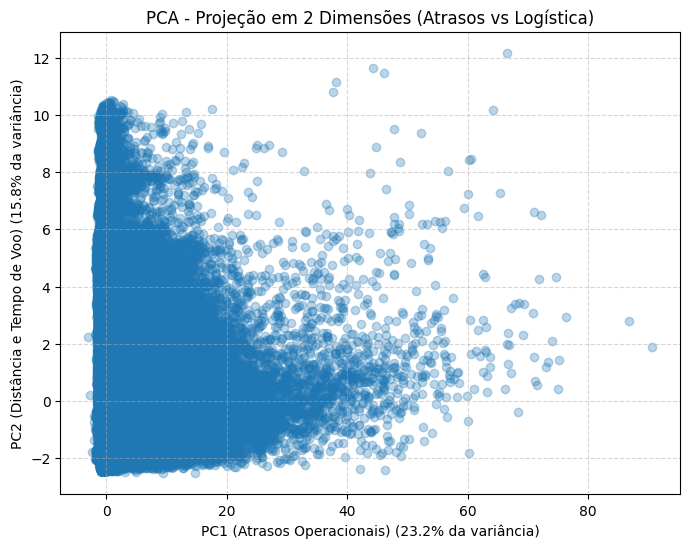

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], alpha=0.3)

plt.xlabel(f"PC1 (Atrasos Operacionais) ({var[0]*100:.1f}% da variância)")
plt.ylabel(f"PC2 (Distância e Tempo de Voo) ({var[1]*100:.1f}% da variância)")

plt.title("PCA - Projeção em 2 Dimensões (Atrasos vs Logística)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,
    index=pca_features,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)],
)

In [90]:
print("\nTabela de Loadings (Influência das variáveis nos componentes):")
print(loadings)


Tabela de Loadings (Influência das variáveis nos componentes):
                            PC1       PC2       PC3       PC4       PC5  \
DEPARTURE_DELAY        0.564692  0.015087 -0.015221 -0.004548 -0.053775   
ARRIVAL_DELAY          0.566163 -0.005685 -0.036603 -0.002408  0.024519   
AIR_TIME               0.007219  0.656711  0.260047  0.038601 -0.001352   
DISTANCE               0.001253  0.660526  0.242030  0.029096 -0.013201   
AIR_SYSTEM_DELAY       0.225310  0.008742  0.069059  0.069953  0.448692   
SECURITY_DELAY         0.016568  0.004769  0.000254 -0.001193  0.027849   
AIRLINE_DELAY          0.372262  0.020488 -0.021153 -0.027387 -0.525184   
LATE_AIRCRAFT_DELAY    0.378018 -0.014501 -0.051001 -0.007640 -0.010434   
WEATHER_DELAY          0.162657 -0.006346  0.012993  0.014330  0.715628   
ORIGIN_LATITUDE       -0.001309 -0.034766  0.009686  0.704225 -0.050251   
ORIGIN_LONGITUDE       0.028561 -0.231565  0.669487 -0.021342 -0.033834   
DESTINATION_LATITUDE   0.001224 -0.0

#### Considerações


#### 1. Diagnóstico da Eficiência Operacional (O Eixo PC1)

- A nossa primeira componente principal (PC1), que retém 23.2% da variância do dataset,<br>
  funciona como um "Índice de Atraso Gerencial".

  - **Fator Dominante:** O atraso de partida e chegada (DEPARTURE_DELAY e ARRIVAL_DELAY) <br>
    possuem os maiores pesos (0.56), seguidos por atrasos causados pela própria companhia <br>
    (AIRLINE_DELAY) e por aeronaves que chegam tarde (LATE_AIRCRAFT_DELAY).
  - **Insight:** O modelo revela que a maior fonte de instabilidade na operação não é o clima, <br>
    mas sim o efeito cascata operacional. Problemas internos da empresa e a logística <br>
    de reuso de aeronaves impactam o sistema mais do que qualquer fator externo.


c:\Users\Pc Gamer\OneDrive\FIAP\Machine Learnig Engineering\Fase - 03\fiap_tech_challenge_fase3\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


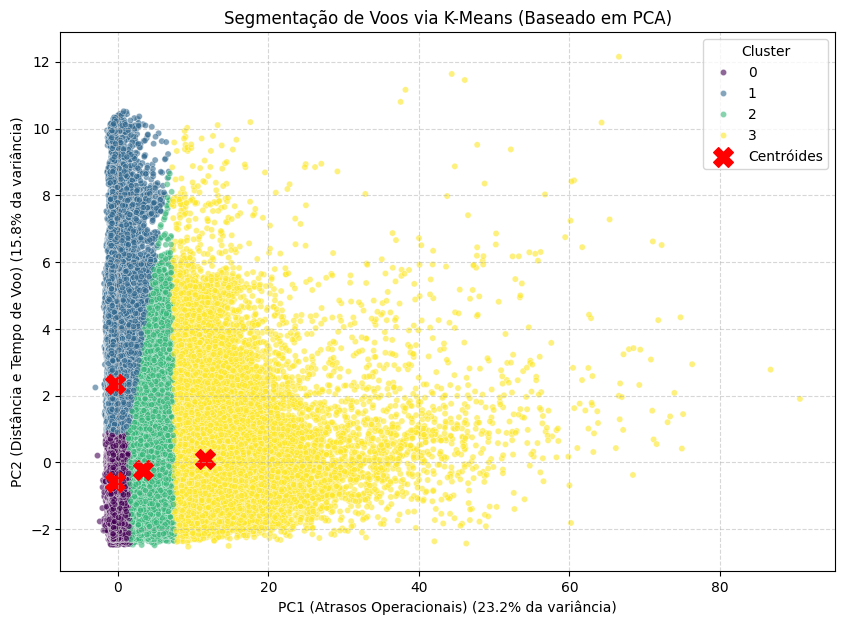


--- Perfil Médio de cada Cluster ---
         DEPARTURE_DELAY  ARRIVAL_DELAY    AIR_TIME     DISTANCE  \
CLUSTER                                                            
0               0.953057      -3.820879   84.460694   577.591959   
1               3.639462      -3.987259  230.479005  1820.660510   
2              79.149620      80.538770  105.322070   741.958274   
3             257.408138     257.876180  119.539217   861.073372   

         AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
CLUSTER                                                                         
0                1.116962        0.005567       0.785773             0.904092   
1                1.719870        0.012935       1.485687             1.012832   
2               15.277802        0.095206      24.327662            36.860777   
3               34.132015        0.151385     100.769456           101.881471   

         WEATHER_DELAY  ORIGIN_LATITUDE  ORIGIN_LONGITUDE  \
CLUST

In [ ]:
# 1. Definição do número de clusters (K)
# Para este problema, 4 grupos costumam representar bem os perfis (Eficientes, Longos, Críticos e Médios)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)

# 2. Aplicando o K-Means sobre os dados do PCA (X_pca_2d)
# Usar o PCA melhora a performance e a separação dos grupos
clusters = kmeans.fit_predict(X_pca_2d)

# 3. Adicionando os resultados ao DataFrame original para análise
DF_model_pca["CLUSTER"] = clusters

# 4. Visualização dos Clusters no Espaço PCA
plt.figure(figsize=(10, 7))

# Criamos um scatter plot colorido pelos clusters identificados
sns.scatterplot(
    x=X_pca_2d[:, 0],
    y=X_pca_2d[:, 1],
    hue=clusters,
    palette="viridis",
    alpha=0.6,
    s=20,
)

# Adicionando os Centróides (o "coração" de cada grupo)
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="X",
    s=200,
    color="red",
    label="Centróides",
)

# Rótulos interpretados anteriormente
plt.xlabel(f"PC1 (Atrasos Operacionais) ({var[0]*100:.1f}% da variância)")
plt.ylabel(f"PC2 (Distância e Tempo de Voo) ({var[1]*100:.1f}% da variância)")
plt.title("Segmentação de Voos via K-Means (Baseado em PCA)")
plt.legend(title="Cluster")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# 5. Insight: Perfil Médio de cada Cluster
# Vamos ver a média das variáveis originais para entender quem é cada grupo
analise_clusters = DF_model_pca.groupby("CLUSTER")[pca_features].mean()
print("\n--- Perfil Médio de cada Cluster ---")
print(analise_clusters)